<div style="display: flex; background-color: RGB(220, 102, 160);" >
<h1 style="margin: auto; padding: 30px; ">PROJECT CNN NUMBERS</h1>
</div>

Context : numbers to predict

<div class="alert alert-block alert-danger"> !!! </div>


<div class="alert alert-block alert-warning"> USE </div>

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Data and Libraries Importation</h2>
</div>

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator # the good one!!


In [4]:
df = pd.read_csv("data/train.csv")
train = df.copy()

In [5]:
df2 = pd.read_csv("data/test.csv")
test = df2.copy()

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Dataset Exploration </h2>
</div>

In [6]:
print(train.shape)
print('')
train.info()
train.head()

(42000, 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


❓ La target est le label?


In [7]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Model baseline</h2>
</div>

In [8]:
# pretrained_base = tf.keras.models.load_model()
# pretrained_base.trainable = False

In [9]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

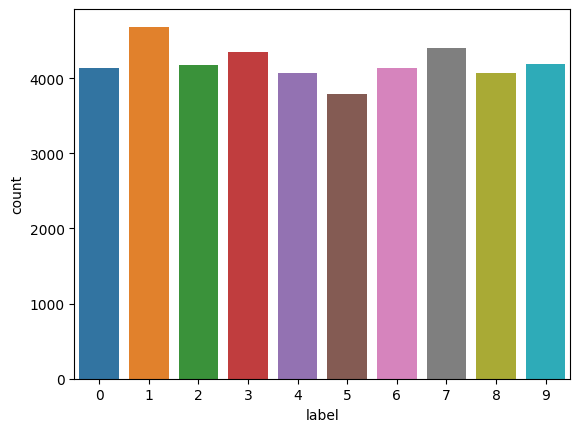

In [10]:
# Vizualize the dataset

numbers_count = sns.countplot(Y_train)

Y_train.value_counts()

<div class="alert alert-info">
We have similar counts for them all.
</div>

In [11]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
# Check the data
test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

<div class="alert alert-info">
There is no missing values in the train and test dataset. So we can safely go ahead.
</div>

<div class="alert alert-info">
*Normalisation*
    
Normalisation is done to reduce the scale of the input values. The pixel value ranges from 0 to 255 which specify gradient of gray. The CNN will converge more faster on values 0 to 1 than 0 to 255. So we divide every value by 255 to scale the data from [0..255] to [0..1]. It helps the model to better learning of features by decreasing computational complexities if we have data that scales bigger.
</div>

In [14]:
# Normalize the data (to reduce the effect of illumination's differences and CNN converg faster on [0..1] data than on [0..255])

X_train = X_train / 255.0
test = test / 255.0


<div class="alert alert-info">
Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.
    
Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.
</div>

In [15]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [16]:
# SEEE NUMBAAAAH

# number=np.array(pixel_data)
# number=number.reshape(len(pixel_data),28,28,1)

In [17]:

# plt.imshow(number[0])
# plt.title("Value is: %d" % Y_train[0])

<div class="alert alert-info">
Label Encoding

Since the CNN model will give results in a vector of predictions for each classes. The label (numbers) are encoded into hot vector for prediction by the model. So that we can train the CNN with the encoded outputs and the parameters are tuned accordingly
</div>

In [22]:
Y_train = to_categorical(Y_train, num_classes = 10)

#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

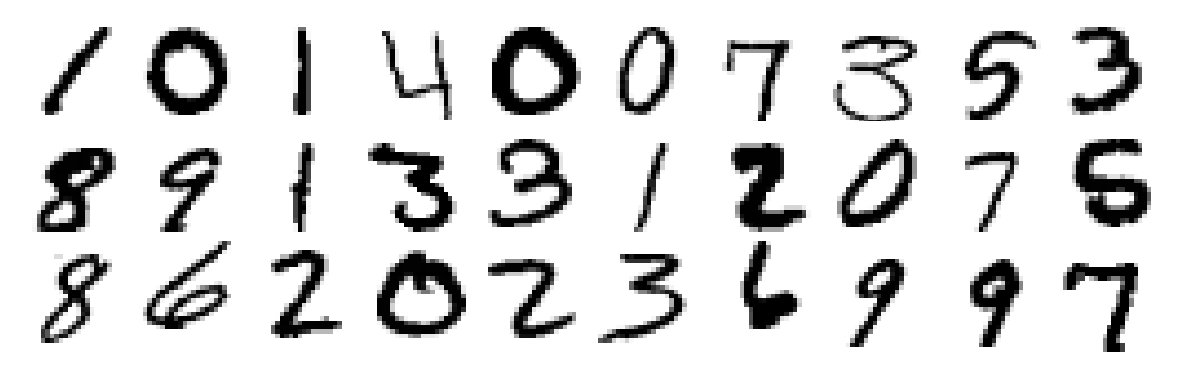

In [19]:
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [23]:
#Spliting Train and test set
random_seed =2

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)

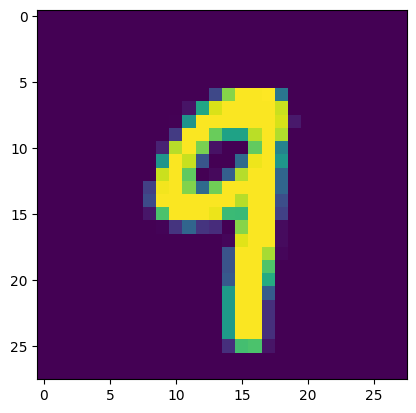

In [27]:
#Show some example 

g = plt.imshow(X_train[2][:,:,0])

In [44]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3,padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [46]:
# Define the optimizer

#?????
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [49]:
# Compile the model
model.compile(optimizer='adam',
              loss = "categorical_crossentropy", metrics=["accuracy"])



In [65]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=250,
)

#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 


Epoch 1/250


ValueError: in user code:

    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


In [64]:
print(Y_train.shape)
print(Y_val.shape)
print(X_train.shape)
print(X_val.shape)

(37800, 10, 10)
(4200, 10, 10)
(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [63]:
# RESHPAE FIRST TRY

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
# X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))


In [68]:
# RESHAPE SECOOND TRY

# Reshape the input data to have a single color channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# Convert the target classes to categorical format
Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)


In [73]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model.add(Conv2D(filters = 32, kernel_size = 3,padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(4,4)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = 3,padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(4,4), strides=(4,4)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(64, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, Y_train,
#                     validation_data=(X_val, Y_val),
#                     batch_size=32,
#                     epochs=250,
#                     verbose=1)


In [74]:
# Compile the model
model.compile(optimizer='adam',
              loss = "categorical_crossentropy", metrics=["accuracy"])


In [75]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=250,
)

Epoch 1/250


ValueError: in user code:

    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10, 10) and (None, 10) are incompatible
